In [1]:
import os
import sys
import glob
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits   as fits

from   astropy.table     import Table

In [2]:
sys.path.append('{}/DESI'.format(os.environ['HOME']))

In [3]:
import pubplot
from   findfile import findfile

In [4]:
version = 'latest'
survey  = 'desi'
dryrun  = False

In [5]:
def grab_ddplimit(fpath):
    dat = fits.open(fpath)

    result = {}
    
    for key in ['RLIM', 'GMR_0P0', 'GMR_0P1', 'ALL']:
        result[key] = dat[1].header[key]
        
    result['DATA']  = Table.read(fpath)
    result['COUNT'] = fpath.split('_')[-1].replace('.fits', '')
    
    print(fpath)
    
    return result

In [6]:
! pwd

/cosma/home/durham/dc-wils7/DESI/docs/nb


In [7]:
fpaths = sorted(glob.glob(os.environ['HOME'] + '/data/GAMA4/ddrp_limits/{}*.fits'.format(survey)))
fpaths

['/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/desi_ddrp_limit_0.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/desi_ddrp_limit_1.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/desi_ddrp_limit_10.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/desi_ddrp_limit_11.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/desi_ddrp_limit_12.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/desi_ddrp_limit_13.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/desi_ddrp_limit_14.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/desi_ddrp_limit_15.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/desi_ddrp_limit_16.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/desi_ddrp_limit_17.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/desi_ddrp_limit_18.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/desi_ddrp_limit_19.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/d

In [8]:
ddp_limits = [grab_ddplimit(x) for x in fpaths]

/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/desi_ddrp_limit_0.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/desi_ddrp_limit_1.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/desi_ddrp_limit_10.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/desi_ddrp_limit_11.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/desi_ddrp_limit_12.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/desi_ddrp_limit_13.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/desi_ddrp_limit_14.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/desi_ddrp_limit_15.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/desi_ddrp_limit_16.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/desi_ddrp_limit_17.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/desi_ddrp_limit_18.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/desi_ddrp_limit_19.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/desi_ddrp_limit_2.fits
/cosma/home/durham/dc-wils7/

In [9]:
fpath = findfile(ftype='kE', version=version, dryrun=dryrun, survey=survey)
kE    = Table.read(fpath)
kE

TARGETID,CHI2,COEFF [10],ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,ROS,ROS_DIST,GOOD_Z,ZDESI,FIELD,GAMA_FIELD,GMAG_DRED,RMAG_DRED,W1MAG_DRED,W2MAG_DRED,GMR,DETMAG,IN_GOLD,IN_CLUSTERING,IN_FULL,WEIGHT_ZFAIL,WEIGHT,NZ,NTILE,TILES,TILELOCIDS,LOCATION_ASSIGNED,TILELOCID_ASSIGNED,COMP_TILE,FRACZ_TILELOCID,BITWEIGHTS [2],PROB_OBS,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,LUMDIST,DISTMOD,CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,GAMA_SEP,GOOD_MATCH,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Mpc,,,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,arcsec,,,,,,,,,,,,,,,,,,,,,,,
int64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,int16,int64,bytes2,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,int64,float64,bool,float64,bytes3,bytes3,float32,float32,float32,float32,float32,float32,bool,bool,bool,float64,float64,float64,int64,bytes43,bytes143,bool,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,bool,float64,int32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
39627733927462346,8692.672918319702,121.68951238388622 .. -14.996086956969426,3.8697103852301554e-05,0,7886,GALAXY,--,10,301.08885838184506,0,212.07182231138097,-2.1576366940231786,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.6695692747287785,516,9010,318256,1482,SER,5.435668,15.029476,29.7828,334.7293,124.587234,36.408154,0,0,--,0.0,0.0,0.0,0.0,2121m022,0.059076868,28.868391,23.604856,2.337881,0.5745999,2.3560472,6.5144067,12.909119,2.3666756,6.5423255,12.962651,2.4321775,0.82148373,0.07292092,-0.32329565,S,102100,9,1152921504606846976,131074,0,0,0,0,0,212.07182231138097,-2.1576366940231786,1,329.2138,1,1,-0.004,0.004,0.001,0.001,212.0718068853151,0.0,-2.157639871379078,0.0,0.7514636,17,1.7193414733275092,True,0.2083179377892946,R17,NAN,20.471994,19.429739,18.838074,19.060822,1.0422554,19.429739,True,True,True,1.0,3.0714285714285716,0.011040410670367769,1,532,5321463,True,1,0.5714285714285714,0.3333333333333333,37439489807543353 .. 6991981798404131877,0.3203125,-507.1203432685779,-317.768561089396

In [10]:
fpath = findfile(ftype='ddp', version=version, dryrun=dryrun, survey=survey)
ddp   = Table.read(fpath)
ddp

TARGETID,CHI2,COEFF [10],ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,ROS,ROS_DIST,GOOD_Z,ZDESI,FIELD,GAMA_FIELD,GMAG_DRED,RMAG_DRED,W1MAG_DRED,W2MAG_DRED,GMR,DETMAG,IN_GOLD,IN_CLUSTERING,IN_FULL,WEIGHT_ZFAIL,WEIGHT,NZ,NTILE,TILES,TILELOCIDS,LOCATION_ASSIGNED,TILELOCID_ASSIGNED,COMP_TILE,FRACZ_TILELOCID,BITWEIGHTS [2],PROB_OBS,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,LUMDIST,DISTMOD,CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,GAMA_SEP,GOOD_MATCH,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,DDP [3],DDPZLIMS [3]
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Mpc,,,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,arcsec,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
int64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,int16,int64,bytes2,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,int64,float64,bool,float64,bytes3,bytes3,float32,float32,float32,float32,float32,float32,bool,bool,bool,float64,float64,float64,int64,bytes43,bytes143,bool,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,bool,float64,int32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,int64,int64
39627733927462346,8692.672918319702,121.68951238388622 .. -14.996086956969426,3.8697103852301554e-05,0,7886,GALAXY,--,10,301.08885838184506,0,212.07182231138097,-2.1576366940231786,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.6695692747287785,516,9010,318256,1482,SER,5.435668,15.029476,29.7828,334.7293,124.587234,36.408154,0,0,--,0.0,0.0,0.0,0.0,2121m022,0.059076868,28.868391,23.604856,2.337881,0.5745999,2.3560472,6.5144067,12.909119,2.3666756,6.5423255,12.962651,2.4321775,0.82148373,0.07292092,-0.32329565,S,102100,9,1152921504606846976,131074,0,0,0,0,0,212.07182231138097,-2.1576366940231786,1,329.2138,1,1,-0.004,0.004,0.001,0.001,212.0718068853151,0.0,-2.157639871379078,0.0,0.7514636,17,1.7193414733275092,True,0.2083179377892946,R17,NAN,20.471994,19.429739,18.838074,19.060822,1.0422554,19.429739,True,True,True,1.0,3.0714285714285716,0.0110404

In [11]:
ddp.meta

OrderedDict([('EXTNAME', 'ZCATALOG'),
             ('TILEID', 238),
             ('TILERA', 216.327),
             ('TILEDEC', -0.717),
             ('FIELDROT', -0.0743063091867413),
             ('FA_PLAN', '2022-07-01T00:00:00.000'),
             ('FA_HA', 0.0),
             ('FA_RUN', '2021-05-29T23:32:41+00:00'),
             ('REQRA', 216.327),
             ('REQDEC', -0.717),
             ('FIELDNUM', 0),
             ('FA_VER', '4.0.0'),
             ('FA_SURV', 'sv3'),
             ('DEPNAM00', 'python'),
             ('DEPVER00', '3.8.3'),
             ('DEPNAM01', 'numpy'),
             ('DEPVER01', '1.19.1'),
             ('DEPNAM02', 'matplotlib'),
             ('DEPVER02', '3.2.1'),
             ('DEPNAM03', 'astropy'),
             ('DEPVER03', '4.0.1.post1'),
             ('DEPNAM04', 'fitsio'),
             ('DEPVER04', '1.1.2'),
             ('DEPNAM05', 'desiutil'),
             ('DEPVER05', '3.2.1'),
             ('DEPNAM06', 'desimodel'),
             ('DEPVER06', 

0	0	12.000	0.131	0.164	True
1	1	12.000	0.298	0.299	True
2	10	12.000	0.603	0.555	False
3	11	12.000	0.785	0.682	False
4	12	12.000	0.933	0.773	False
5	13	12.000	1.067	0.900	False
6	14	19.500	0.131	0.164	True
7	15	19.500	0.298	0.299	True
8	16	19.500	0.443	0.423	True
10	18	19.500	0.785	0.682	True
11	19	19.500	0.933	0.773	True
12	2	12.000	0.443	0.423	True
13	20	19.500	1.067	0.900	True
14	21	19.500	0.131	0.164	False
15	22	19.500	0.298	0.299	False
16	23	19.500	0.443	0.423	False
17	24	19.500	0.603	0.555	False
18	25	19.500	0.785	0.682	False
19	26	19.500	0.933	0.773	False
20	27	19.500	1.067	0.900	False
22	4	12.000	0.785	0.682	True
23	5	12.000	0.933	0.773	True
24	6	12.000	1.067	0.900	True
							BRIGHT: 7
25	7	12.000	0.131	0.164	False
26	8	12.000	0.298	0.299	False
27	9	12.000	0.443	0.423	False


(-16.5, -22.5)

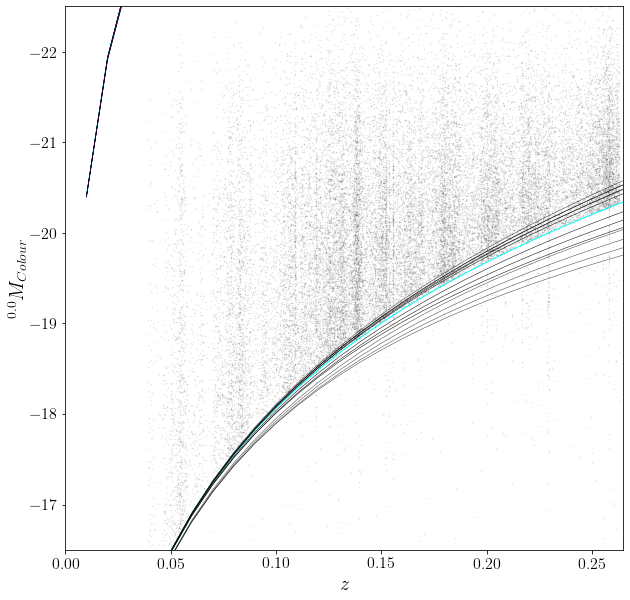

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

plt.scatter(kE['ZGAMA'], kE['DDPMALL_0P0'], s=0.25, alpha=0.1, c='k')

for i, ddp_limit in enumerate(ddp_limits):
    data = ddp_limit['DATA']
    cnt  = ddp_limit['COUNT']
    rlim = ddp_limit['RLIM']
    
    MCOL = [x for x in data.dtype.names if 'M0P0' in x][0]
    
    if 'COLOR' in MCOL:
        alpha = 0.75
    else:
        alpha = 1.00
    
    if (ddp_limit['ALL'] == True) & (ddp_limit['GMR_0P1'] == 0.603):
        ax.plot(data['Z'], data[MCOL], c='cyan', lw=1., alpha=alpha)
        continue
    
    if (ddp_limit['ALL'] == False) & (rlim == 19.8) & (ddp_limit['GMR_0P1'] == 1.067):
        ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5, alpha=alpha)

        print('\t\t\t\t\t\t\tFAINT: {}'.format(cnt))
        
    elif (ddp_limit['ALL'] == False) & (rlim == 12.0) & (ddp_limit['GMR_0P1'] == 0.131):        
        ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5, alpha=alpha)

        print('\t\t\t\t\t\t\tBRIGHT: {}'.format(cnt))
        
    else:
        ax.plot(data['Z'], data[MCOL], c='k', lw=0.5, alpha=alpha)
    
    print('{:d}\t{}\t{:.3f}\t{:.3f}\t{:.3f}\t{}'.format(i, cnt, ddp_limit['RLIM'], ddp_limit['GMR_0P1'], ddp_limit['GMR_0P0'], ddp_limit['ALL']))
    
ax.set_xlabel(r'$z$')
ax.set_ylabel('$^{0.0}M_{Colour}$')

ax.set_xlim(  0.0, 0.265)
ax.set_ylim(-16.5, -22.5)

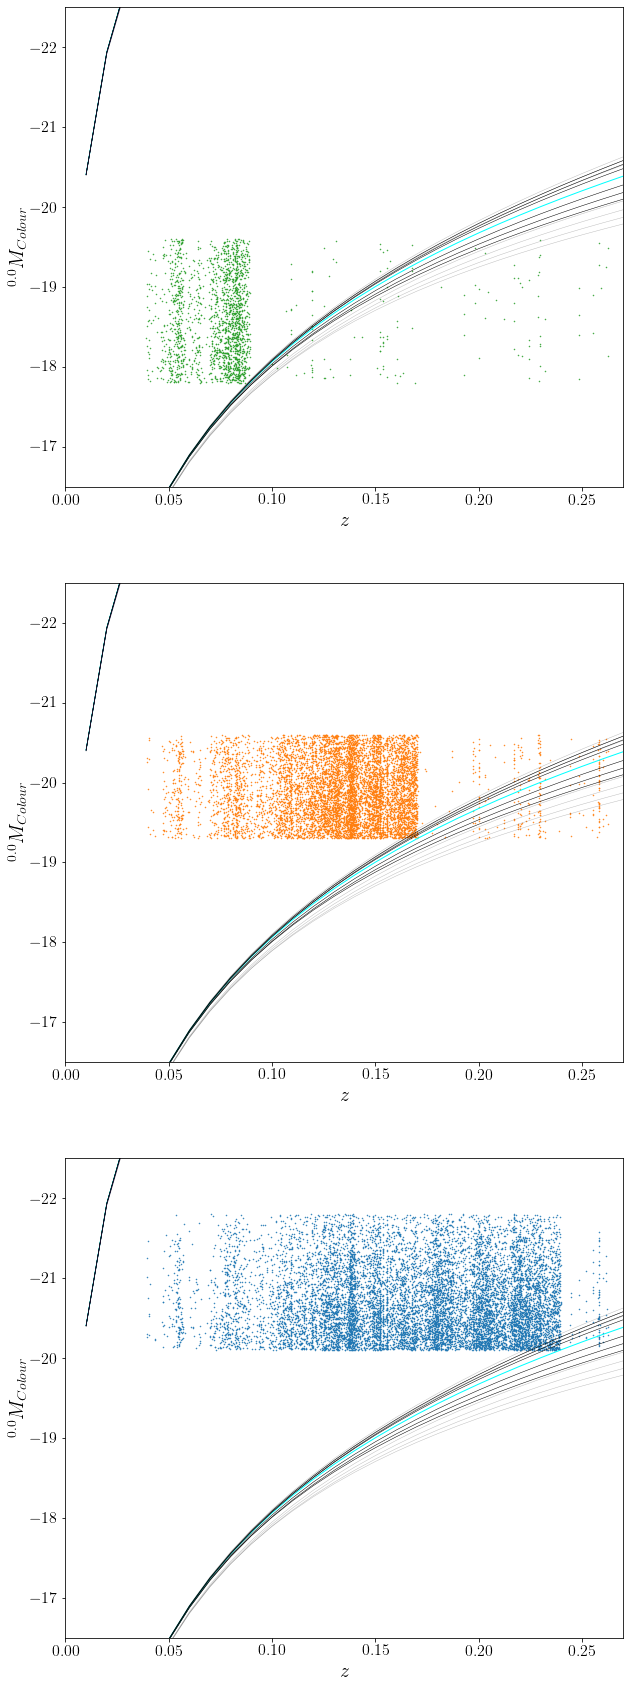

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(10,30))

colors    = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, ax in enumerate(axes[::-1]):    
    is_ddp = [x == 1 for x in ddp['DDP'].data[:,i]]
    ax.scatter(ddp['ZGAMA'][is_ddp], ddp['DDPMALL_0P0'][is_ddp], s=0.25, alpha=1., c=colors[i])

for ax in axes:
    for i, ddp_limit in enumerate(ddp_limits):
        data = ddp_limit['DATA']

        cnt  = ddp_limit['COUNT']
        rlim = ddp_limit['RLIM']
        
        MCOL = [x for x in data.dtype.names if 'M0P0' in x][0]

        if 'COLOR' in MCOL:
            alpha = 0.25
        else:
            alpha = 1.0

        if (ddp_limit['ALL'] == True) & (ddp_limit['GMR_0P1'] == 0.603):
            ax.plot(data['Z'], data[MCOL], c='cyan', lw=1., alpha=alpha)
            continue
    
        if (ddp_limit['ALL'] == False) & (rlim == 19.8) & (ddp_limit['GMR_0P1'] == 1.067):
            ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5, alpha=alpha)
        
        elif (ddp_limit['ALL'] == False) & (rlim == 12.0) & (ddp_limit['GMR_0P1'] == 0.131):        
            ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5, alpha=alpha)
        
        else:
            ax.plot(data['Z'], data[MCOL], c='k', lw=0.5, alpha=alpha)
        
        # print('{:d}\t{}\t{:.3f}\t{:.3f}\t{:.3f}\t{}'.format(i, cnt, ddp_limit['RLIM'], ddp_limit['GMR_0P1'], ddp_limit['GMR_0P0'], ddp_limit['ALL']))
    
        ax.set_xlabel(r'$z$')
        ax.set_ylabel('$^{0.0}M_{Colour}$')
        
        ax.set_xlim(  0.0, 0.270)
        ax.set_ylim(-16.5, -22.5)

# Done.